In [1]:
import csv
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()  

df = pd.read_csv(io.StringIO(uploaded['Ruthenium_Prices.csv'].decode('utf-8')))




Saving Ruthenium_Prices.csv to Ruthenium_Prices.csv


In [2]:
from csv import reader
dates_list=list()
year=list()
day=list()
month=list()
price_list=list()
data=list()
temp=list()
with open('Ruthenium_Prices.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)

    for row in csv_reader:
       
        dates_list.append(row[0].split(';',1)[0])
        price_list.append(row[0].split(';',1)[1])
price_list.pop(0) 
dates_list.pop(0)
print(price_list) 
print(dates_list)
 
for i in dates_list[0:]:
    
    year.append(i.split('-',2)[0])
    month.append(i.split('-',2)[1])
    day.append(i.split('-',2)[2])
for i in range(0,len(dates_list)):
  temp.append(float(day[i]))
  temp.append(float(month[i]))
  temp.append(float(year[i]))
  temp.append(float(price_list[i]))
  data.append(temp)
  temp=list() 

dfData=pd.DataFrame(data,columns=['day','month','year','price'])

#print(year)
#print(month)
#print(day)
print(dfData)

       

['270.0', '270.0', '260.0', '250.0', '250.0', '250.0', '250.0', '250.0', '250.0', '250.0', '253.0', '253.0', '265.0', '267.0', '270.0', '270.0', '270.0', '270.0', '270.0', '265.0', '265.0', '260.0', '250.0', '250.0', '250.0', '245.0', '215.0', '200.0', '195.0', '190.0', '165.0', '95.0', '68.0', '65.0', '65.0', '65.0', '65.0', '65.0', '43.0', '40.0', '40.0', '40.0', '40.0', '40.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '42.0', '45.0', '50.0', '50.0', '54.0', '56.0', '56.0', '58.0', '58.0', '58.0', '61.0', '66.0', '68.0', '70.0', '72.0', '72.0', '69.0', '65.0', '60.0', '57.0', '57.0', '57.0', '57.0', '73.0', '82.0', '85.0', '85.0', '85.0', '85.0', '85.0', '85.0', '90.0', '90.0', '110.0', '110.0', '110.0', '115.0', '115.0', '115.0', '115.0', '120.0', '130.0', '120.0', '110.0', '120.0', '130.0', '160.0', '175.0', '180.0', '180.0', '180.0', '180.0', '180.0', '180.0', '180.0', '180.0', '175.0', '175.0', '180.0', '195.0

In [0]:

dfData['year']=dfData['year']-1992



In [9]:
dfData

,day,month,year,price
0,31.0,5.0,28.0,270.0
1,30.0,4.0,28.0,270.0
2,31.0,3.0,28.0,260.0
3,29.0,2.0,28.0,250.0
4,31.0,1.0,28.0,250.0
...,...,...,...,...
330,30.0,11.0,0.0,25.0
331,31.0,10.0,0.0,30.0
332,30.0,9.0,0.0,32.0
333,31.0,8.0,0.0,32.0


In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = dfData[["year"]]
y_data = dfData['price']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[["year"]], y_train)
lre.score(x_test[["year"]], y_test)
print('The R-square is: ', lre.score(x_test[["year"]], y_test))

number of test samples : 67
number of training samples: 268
The R-square is:  0.14103974288684407


Text(3, 0.75, 'Maximum R^2 ')

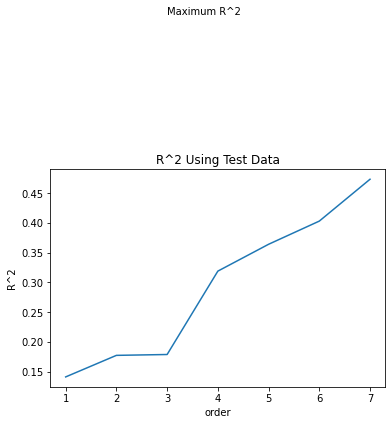

In [11]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(x_train[["year"]], y_train)
Rsqu_test = []

order = [1, 2, 3,4,5,6,7]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[["year"]])
    
    x_test_pr = pr.fit_transform(x_test[["year"]])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.89015e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.89015e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.1073e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.03225e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35831e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

predicted: [71.19331819 23.69929687 69.31638573 60.252391  ]
test set : [57. 45. 43. 53.]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.92905e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.96795e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.00685e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.04575e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.08466e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

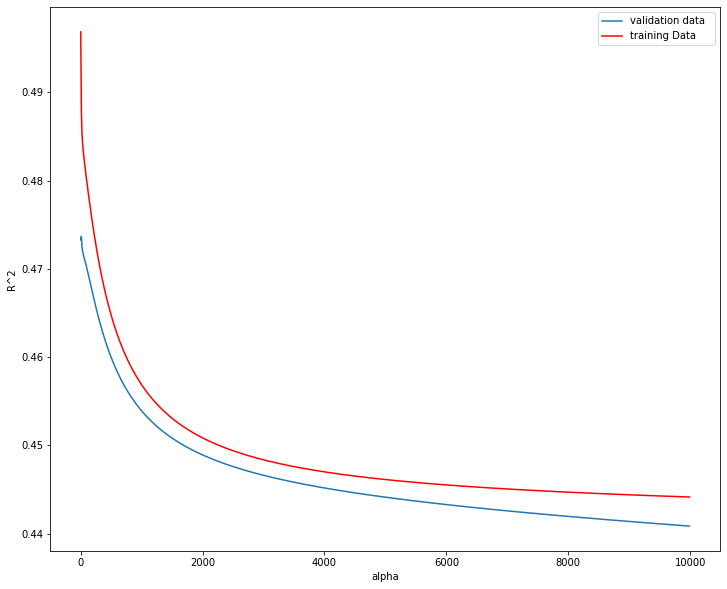

In [14]:


from sklearn.preprocessing import PolynomialFeatures
import numpy as np


pr=PolynomialFeatures(degree=7)
x_train_pr=pr.fit_transform(x_train[["year"]])
x_test_pr=pr.fit_transform(x_test[["year"]])
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [15]:
x_test_pr2=pr.fit_transform([[2000-1992]])
yhat = RigeModel.predict(x_test_pr2)
print('predicted:', yhat)



predicted: [44.59566677]
